# Project 2: Ames Housing Analysis
###  Contents:
  1. [Executive Summary](#Executive-Summary)
  2. [Problem Statement](#Problem-Statement)
  3. [Background & Research](#Background-&-Research)
  4. [Data Wrangling](#Data-Wrangling)
  5. [Exploration & Visualisation](#Exploration-&-Visualisation)
  6. [Pre-Processing & Modelling](#Pre-Processing-&-Modelling)
  7. [Kaggle Prediction](#Kaggle-Prediction)
  8. [Results & Analysis](#Results-&-Analysis)
  9. [Recommendations & Conclusions](#Recommendations-&-Conclusions)
  10. [References](#References)

## Executive Summary

In the real estate market, housing prices are determined by the attributes of the property itself and by the characteristics of the neighbourhood within which it resides. This method of pricing is known as hedonic pricing. It is reasonable to expect internal factors (such as property size) and external factors (such as availability of amenities) to have an impact on housing prices. The attributes and characteristics that are believed to have a considerable impact on housing prices were selected. This project aims to help real estate buyers and sellers predict the price of a house in Ames, Iowa based on a set of property-specific traits. The prediction will be made with the best linear regression model as evaluated by R-Squared and Mean Squared Error. Three linear regression models (Ordinary Least Squares, Ridge, Lasso) were evaluated. The entire dataset was first split into a training dataset and a testing dataset. After cross validation, Linear and Ridge models had an R-Squared of around 0.88, while lasso had an R-Squared of around 0.77. When fitted on the training dataset and testing dataset, All three models had an R-Squared of around 0.91 on the training dataset and around 0.90 for the testing dataset. The Mean Squared Error of all three models was around 0.6 billion on the training dataset and around 0.5 billion on the testing dataset. Ridge was selected as the model of choice. After training on the entire dataset, the final R-Squared obtained was 0.91 while the final Mean Squared Error obtained was 0.59 billion. The Ridge model also outperformed the Null model, which gave a baseline R-Squared of 0.00 and a baseline Mean Squared Error of 6.28 billion. The 5 biggest determinants of housing sale price were found to be Above Ground Living Area, Overall Quality, Total Bathrooms, Total Basement Area, and Masonry Veneer Area. Interested real estate buyers and sellers may utilise this model to predict the price of a house in Ames, Iowa and make more informed buy-sell decisions. Buyers will be able to know if they are under- or over-paying for a house at the current quoted market price, and sellers will be able know if they are under- or over-asking for their house with reference to how much a house like theirs has sold for historically.


## Problem Statement

This project aims to help real estate buyers and sellers predict the price of a house in Ames, Iowa based on a set of property- and neighbourhood-specific traits and decide if the current quoted market price is above or below what the house would reasonably be bought or sold at. The prediction will be made with the best linear regression model amongst the trio (Ordinary Least Squares, Ridge, Lasso) as evaluated by R-Squared and Mean Squared Error.

## Background & Research


In the real estate market, housing prices are determined by the attributes of the property itself and by the characteristics of the neighbourhood within which it resides. This method of pricing a marketed good is known as hedonic pricing, wherein an item is treated as the sum of its individual qualities that cannot be sold separately in the market, with the objective of estimating the extent to which each of these qualities affect the market price of the item. 

Hedonic pricing is used traditionally to estimate economic values for environmental or ecosystem services that directly affect market prices. Essentially, the basic premise of the hedonic pricing method is that the price of a marketed good is related to its traits. 

With respect to housing prices, it is reasonable to expect internal factors (such as property size, age, material quality, physical condition, and features like fireplaces or pools) and external factors (such as availability of amenities, proximity to public transportation, crime rate, socioeconomic status of households, and level of air or water pollution) to have an impact on housing prices. The attributes and characteristics that are believed to have a considerable impact on housing prices were selected as the starting features for the development of the predictive model.

# Data Wrangling
## Data Sources
Data Sources
The following data sources were used:

- [train.csv](../datasets/train.csv): 2006-2010 Ames Housing Dataset For Model Training

This model training dataset contains information on various features and the sale price of houses sold in Ames, Iowa from 2006 to 2010.

- test.csv: 2006-2010 Ames Housing Dataset For Model Testing

This model testing dataset contains information on various features of houses sold in Ames, Iowa from 2006 to 2010.

# Data Importing

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#set_style
sns.set_theme(style="darkgrid")

# Enables Pandas to display all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Enables Pandas to display long strings properly
pd.options.display.max_colwidth = 100

In [2]:
# Load dataset
train = pd.read_csv('../datasets/train.csv')

# check number of rows and columns
print(train.shape)

(2051, 81)


In [3]:
# show first 5 rows
train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Standardising format of column names

In [4]:
# change columns names to lower/snake_case so a little easier to work with
train.columns = train.columns.str.lower().str.replace(' ', '_')

# Data Cleaning

### Error entries

In [5]:
# There was an error with a single entry on max garage year built
train['garage_yr_blt'].value_counts().sort_index().tail()

2007.0    84
2008.0    44
2009.0    17
2010.0     2
2207.0     1
Name: garage_yr_blt, dtype: int64

In [6]:
# Get row where value is 2207
train[train['garage_yr_blt'] == 2207]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


'2207' may be a typo for '2007', as the house was built in 2006, remodeled in 2007 and sold in 2007. 

In [7]:
# Reassign correct value 
train.loc[1699, 'garage_yr_blt'] = 2007

Check if any houses were sold before they were built

In [8]:
train[train['year_built'] > train['yr_sold']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


House was built in 2008, with the garage built in 2008. However, it was sold in 2007. Thus, this entry will be dropped.

In [9]:
# droppping entry
train = train.drop(1885)

Checking other columns, with the same error condition.

In [10]:
train[train['garage_yr_blt'] > train['yr_sold']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [11]:
train[train['year_remod/add'] > train['yr_sold']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1719,1703,528120010,60,RL,134.0,16659,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1582.0,1582.0,GasA,Ex,Y,SBrkr,1582,570,0,2152,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Detchd,2007.0,Unf,2.0,728.0,TA,TA,Y,0,368,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,260116


In [12]:
train = train.drop(1719)

Does the living area above ground match up?

In [13]:
train[(train['1st_flr_sf'] + train['2nd_flr_sf'] + train['low_qual_fin_sf']) != train['gr_liv_area']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


The data is clean with regards to this.

## Missing Values & Imputation

<function matplotlib.pyplot.show(close=None, block=None)>

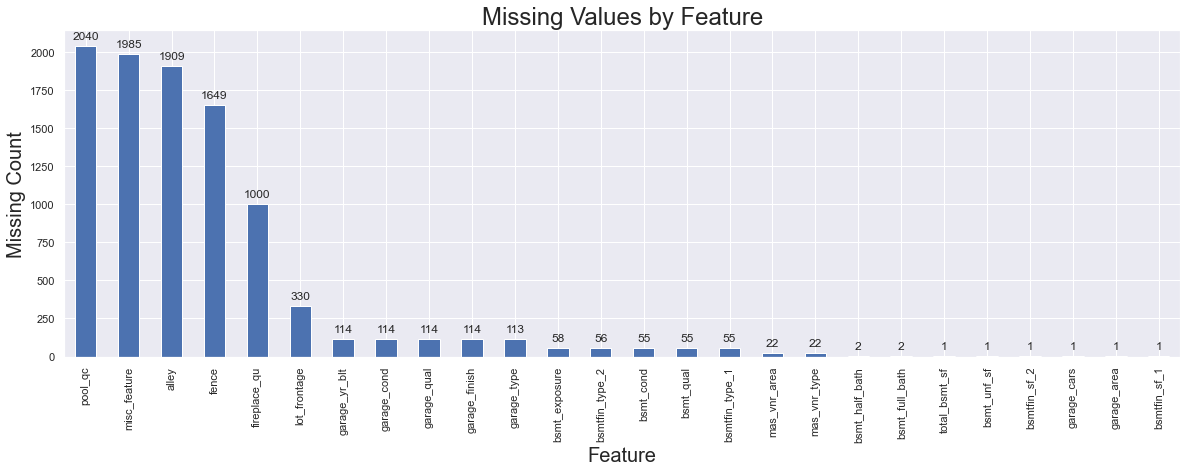

In [14]:
# Check for Columns with NA values
missing = train.isnull().sum()

# Vizualize missing value count
missing = missing[missing > 0]
missing.sort_values(inplace=True,ascending=False)
ax = missing.plot(kind='bar', figsize = (20,6))
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Missing Count',fontsize = 20)
plt.title('Missing Values by Feature', fontsize=24)
def autolabel(rects, ax):
    for rect in rects:
        x = rect.get_x() + rect.get_width()/2.
        y = rect.get_height()
        ax.annotate("{}".format(y), (x,y), xytext=(0,5), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(ax.patches,ax)

plt.show

In [15]:
# Check for duplicated values
print('Duplicated train values:', train.duplicated().sum())

Duplicated train values: 0


In [16]:
# figure = plt.figure(figsize=(6,10))
# sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice',ascending=False),annot=True, cmap='coolwarm', center=0)

# Missing Values & Imputation


In [17]:
# Dropped high amounts of null columns
train.drop(columns='pool_qc', inplace=True)
train.drop(columns='misc_feature', inplace=True)
train.drop(columns='alley', inplace=True)
train.drop(columns='fence', inplace=True)

In [18]:
# Considering null values in fireplace quality
train['fireplace_qu'].value_counts() / train.shape[0] * 100

Gd    25.427038
TA    19.863348
Fa     2.879453
Ex     1.512933
Po     1.512933
Name: fireplace_qu, dtype: float64

In [19]:
# Keeping column and labeling NaNs as a new category.
train['fireplace_qu'] = train['fireplace_qu'].fillna('NoFireplace')

Text(0.5, 1.0, 'Distribution of values in Lot Frontage')

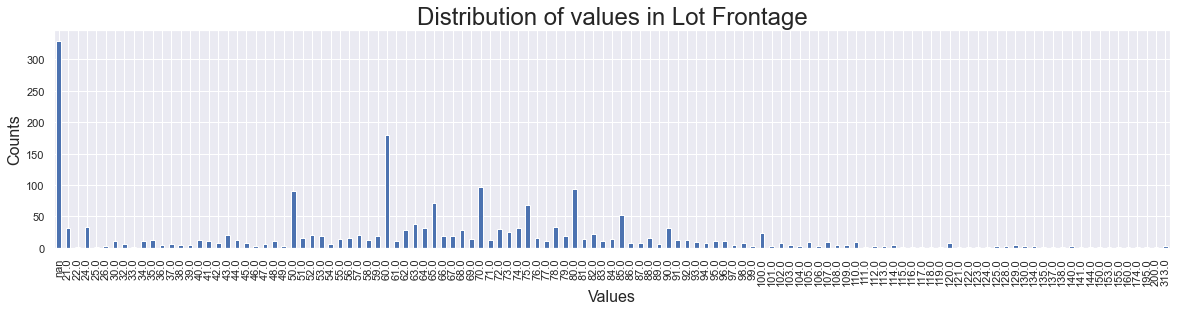

In [20]:
# Visualising distribution of null values in lot_frontage
train['lot_frontage'].value_counts(dropna=False).sort_index(na_position='first').plot(kind='bar', figsize=(20,4));
plt.xlabel('Values',fontsize=16)
plt.ylabel('Counts',fontsize = 16)
plt.title('Distribution of values in Lot Frontage', fontsize=24)

City of Ames Municipal code have regulations for minimum lot frontage. Replacing nulls with 0 in this case does not make sense.

In [21]:
# visualise lot frontage before and after mean imputation
print('Mean Lot Frontage Before Mean Imputation:', train['lot_frontage'].mean())
print('Mean Lot Frontage After Mean Imputation:', 
      train['lot_frontage'].replace(np.nan, train['lot_frontage'].mean()).mean())

# visualise lot frontage before and after median imputation
print('Mean Lot Frontage Before Median Imputation:', train['lot_frontage'].mean())
print('Mean Lot Frontage After Median Imputation:', 
      train['lot_frontage'].replace(np.nan, train['lot_frontage'].median()).mean())

Mean Lot Frontage Before Mean Imputation: 68.98312972658522
Mean Lot Frontage After Mean Imputation: 68.98312972658559
Mean Lot Frontage Before Median Imputation: 68.98312972658522
Mean Lot Frontage After Median Imputation: 68.82479258174719


In [22]:
# checking mean lot frontage for each category of lot configuration
train.groupby('lot_config', as_index=False)[['lot_frontage']].mean()

,lot_config,lot_frontage
0,Corner,83.064286
1,CulDSac,55.228571
2,FR2,60.836735
3,FR3,87.000000
4,Inside,66.906250


In [23]:
# impute null values in lot frontage with the mean of each category of lot configuration 
train_mean_imp = train[['lot_frontage', 'lot_config']].copy()

train_mean_imp.loc[(train_mean_imp['lot_frontage'].isna()) & (train_mean_imp['lot_config'] == 'Corner'), 'lot_frontage'] = 83.25
train_mean_imp.loc[(train_mean_imp['lot_frontage'].isna()) & (train_mean_imp['lot_config'] == 'CulDSac'), 'lot_frontage'] = 55.23
train_mean_imp.loc[(train_mean_imp['lot_frontage'].isna()) & (train_mean_imp['lot_config'] == 'FR2'), 'lot_frontage'] = 60.84
train_mean_imp.loc[(train_mean_imp['lot_frontage'].isna()) & (train_mean_imp['lot_config'] == 'FR3'), 'lot_frontage'] = 87.00
train_mean_imp.loc[(train_mean_imp['lot_frontage'].isna()) & (train_mean_imp['lot_config'] == 'Inside'), 'lot_frontage'] = 66.95
# visualise lot frontage before and after mean imputation by lot configuration
print('Mean Lot Frontage Before Mean Imputation By Lot Configuration:', train['lot_frontage'].mean())
print('Mean Lot Frontage After Mean Imputation By Lot Configuration:', train_mean_imp['lot_frontage'].mean())


Mean Lot Frontage Before Mean Imputation By Lot Configuration: 68.98312972658522
Mean Lot Frontage After Mean Imputation By Lot Configuration: 68.81674963396767


In [24]:
train.groupby('lot_config', as_index=False)[['lot_frontage']].median()

,lot_config,lot_frontage
0,Corner,80.0
1,CulDSac,50.0
2,FR2,60.0
3,FR3,80.0
4,Inside,66.0


In [25]:
# impute null values in lot frontage with the median of each category of lot configuration
train_med_imp = train[['lot_frontage', 'lot_config']].copy()

train_med_imp.loc[(train_med_imp['lot_frontage'].isna()) & (train_med_imp['lot_config'] == 'CulDSac'), 'lot_frontage'] = 50.00
train_med_imp.loc[(train_med_imp['lot_frontage'].isna()) & (train_med_imp['lot_config'] == 'FR2'), 'lot_frontage'] = 60.00
train_med_imp.loc[(train_med_imp['lot_frontage'].isna()) & (train_med_imp['lot_config'] == 'FR3'), 'lot_frontage'] = 80.00
train_med_imp.loc[(train_med_imp['lot_frontage'].isna()) & (train_med_imp['lot_config'] == 'Corner'), 'lot_frontage'] = 80.00
train_med_imp.loc[(train_med_imp['lot_frontage'].isna()) & (train_med_imp['lot_config'] == 'Inside'), 'lot_frontage'] = 66.00

# visualise lot frontage before and after median imputation by lot configuration
print('Mean Lot Frontage Before Median Imputation By Lot Configuration:', train['lot_frontage'].mean())
print('Mean Lot Frontage After Median Imputation By Lot Configuration:', train_med_imp['lot_frontage'].mean())

Mean Lot Frontage Before Median Imputation By Lot Configuration: 68.98312972658522
Mean Lot Frontage After Median Imputation By Lot Configuration: 68.45876037091264


A trial and error approach was chosen to combat the null values in lot_frontage, 4 of them, namely:

- Mean lot_frontage
- Median lot_frontage
- Mean lot_frontage grouped by Lot Configuration
- Median lot_frontage grouped by Lot Configuration


Imputing with the Mean lot_frontage made the slightest change to the mean before and after imputation. It also made the smallest change to the underlying distribution. Hence, Mean lot_frontage will be chosen as the method of imputation.

In [26]:
# imputing null values in lot_frontage column in place with the mean
train['lot_frontage'].replace(np.nan, train['lot_frontage'].mean(), inplace=True)

Text(0.5, 1.0, 'Missing Values by in mas_vnr_area')

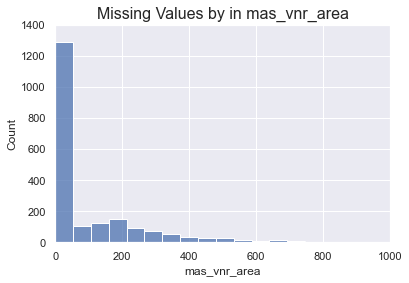

In [27]:
# Does not inclue NaNs to see spread of data
sns.histplot(data=train['mas_vnr_area'],bins=30).set(xlim=(0,1000),ylim=(0,1400))
plt.title('Missing Values by in mas_vnr_area', fontsize=16)

In [28]:
# Get actual value counts
train['mas_vnr_area'].value_counts().head()

0.0      1215
120.0      11
176.0      10
200.0      10
108.0       9
Name: mas_vnr_area, dtype: int64

In [29]:
# Checking Null Values
train['mas_vnr_area'].isna().sum()

22

In [30]:
# Checking rows in the dataframe where Masonry veneer area is null, are equal to the rows where the Masonry veneer type is null:
train[train['mas_vnr_area'].isna()].equals(train[train['mas_vnr_type'].isna()])

True

In [31]:
# Checking if Masonry veneer type has any patterns:
train['mas_vnr_type'].value_counts(dropna=False)

None       1217
BrkFace     630
Stone       167
NaN          22
BrkCmn       13
Name: mas_vnr_type, dtype: int64

Since it is common to have no masonry veneer, therefore, it is reasonable to impute 0.

In [32]:
#imputing 0 in mas_vnr_area
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0.0)

In [33]:
# Checking null values in basement-related columns
train[train.loc[:, train.isna().any()].select_dtypes(exclude='object').columns].isna().sum()

bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
total_bsmt_sf       1
bsmt_full_bath      2
bsmt_half_bath      2
garage_yr_blt     114
garage_cars         1
garage_area         1
dtype: int64

In [34]:
train[train['bsmt_full_bath'].isna()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NoFireplace,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


These 2 rows comprises the missing values for all numerical basement-related columns.
According to the data dictionary,  NA values indicate no basement for columns bsmt_qual and bsmt_cond, therefore they can impute 0.

In [35]:
bsmt_num_null = ['bsmtfin_sf_1',
                 'bsmtfin_sf_2',
                 'bsmt_unf_sf',
                 'total_bsmt_sf',
                 'bsmt_full_bath',
                 'bsmt_half_bath']

for col in bsmt_num_null: 
    train[col] = train[col].fillna(0.0)

# checking total basement square feet
train[(train['bsmtfin_sf_1']  + train['bsmtfin_sf_2'] + train['bsmt_unf_sf']) != train['total_bsmt_sf']]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice


### Null values in numerical garage-related columns

In [36]:
train[train['garage_cars'].isna()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFireplace,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


There is one row with null value, the garage_area and garage_cars are both NaNs. According to the data dictionary, houses with no garage will have a garage_type of NA. 

However, the above row has its value on garage_type as 'Detchd'. 

The rest of the garage-related columns are NaNs - thus giving no further information. 

This is an outlier and will be dropped.

In [37]:
# dropping row
train.dropna(subset=['garage_cars'], inplace=True)

In [38]:
# Checking rows in the dataframe where garage year built is null, are equal to the rows where the garage type is null:
train[train['garage_yr_blt'].isna()].equals(train[train['garage_type'].isna()])

True

The test above shows that the rows in the DataFrame where the garage_yr_blt is NaN are equal to the rows where the garage_type is NaN. 

This would mean we have to replace the year with a placeholder like 'None', which will lead to a mixture of datatypes in the column. Alternatively, the NaNs could be converted to 0s, but this would mean severe skewing of the distribution as the numbers jump from 0 to 1895-2010.

Instead of doing that, we will avoid that issue by replacing the NaNs with '0.0'. Then, we will subtract the year the garage was built from the year the house was sold, to get the age of the garage. We will use this column in place of garage_yr_blt.

In [39]:
# Replace the NaNs with 0s
train['garage_yr_blt'] = train['garage_yr_blt'].fillna(0)

# Get the difference in values for those rows where the 'garage_yr_blt' is not 0
train['garage_age'] = train['yr_sold'] - train['garage_yr_blt'][train['garage_yr_blt'] != 0]

# The newly created columns has NaNs that will be filled with 0.0
train['garage_age'] = train['garage_age'].fillna(0)

# Drop the 'garage_yr_blt' column
train.drop(columns='garage_yr_blt', inplace=True)

# List of categorical columns with null values

In [40]:
train[train.loc[:, train.isna().any()].select_dtypes(include='object').columns].isna().sum()


mas_vnr_type       22
bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_type_2     56
garage_type       113
garage_finish     113
garage_qual       113
garage_cond       113
dtype: int64

In [41]:
# Previously addressed with mas_vnr_area. Will replace wtih 'None'
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

Remaining null values in categorical columns

In [42]:
train[train.loc[:, train.isna().any()].select_dtypes(include='object').columns].isna().sum()

bsmt_qual          55
bsmt_cond          55
bsmt_exposure      58
bsmtfin_type_1     55
bsmtfin_type_2     56
garage_type       113
garage_finish     113
garage_qual       113
garage_cond       113
dtype: int64

According to the data dictionary provided, "NA" indicates no basement.
However, there are a number of differences in the value counts.

First confirm the ones that are similar (55 values)

In [43]:
# checking rows in the DataFrame where the bsmt_qual is NaN are equal to the rows where the bsmt_cond is NaN.
train[train['bsmt_qual'].isna()].equals(train[train['bsmt_cond'].isna()])

True

In [44]:
# checking rows in the DataFrame where the bsmt_qual is NaN are equal to the rows where the bsmtfin_type_1 is NaN.
train[train['bsmt_qual'].isna()].equals(train[train['bsmtfin_type_1'].isna()])

True

Investigating the column features that are different (55 values vs. 56 or 58 values)

In [45]:
train[(train['bsmt_exposure'].isna()) & (train['bsmt_qual'].notna())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_age
1456,1797,528458090,60,FV,81.0,10411,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NoFireplace,Attchd,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,0,7,2007,New,212109,0.0
1547,67,528445060,20,RL,73.0,8987,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,0,5,2010,WD,221500,5.0
1997,2780,907194130,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,192500,4.0


3 rows where the basement is present (according to the other basement-related rows) but the basement exposure is NaN.

Since its just 3 rows, avoiding guesswork is very much disireable as much as possible, thus they are dropped.

In [46]:
# dropping rows
train.drop(train[(train['bsmt_exposure'].isna()) & (train['bsmt_qual'].notna())].index, inplace=True)

Row where the basement is present, but the bsmtfin_type_2 is NaN. In addition, bsmtfin_sf_2 is not zero, hence the basement should have a finishing type.

Dropped as well.

In [47]:
# dropping row
train.drop(train[(train['bsmtfin_type_2'].isna()) & (train['bsmt_qual'].notna())].index, inplace=True)

Remaining categorical columns with NaNs:

In [48]:
train[train.loc[:, train.isna().any()].select_dtypes(include='object').columns].isna().sum()

bsmt_qual          55
bsmt_cond          55
bsmt_exposure      55
bsmtfin_type_1     55
bsmtfin_type_2     55
garage_type       113
garage_finish     113
garage_qual       113
garage_cond       113
dtype: int64

The remaining null values will be filled with 'NoBasement' to indicate 'No Basement'.

In [49]:
# imputing 'NoBasement'
bsmt_cat_null = ['bsmt_qual',
                 'bsmt_cond',
                 'bsmt_exposure',
                 'bsmtfin_type_1',
                 'bsmtfin_type_2',]

for col in bsmt_cat_null: 
    train[col] = train[col].fillna('NoBasement')

## Null values in categorical garage-related columns

According to the data dictionary, NA values indicate no garage.

In [50]:
train[train.loc[:, train.isna().any()].select_dtypes(include='object').columns].isna().sum()

garage_type      113
garage_finish    113
garage_qual      113
garage_cond      113
dtype: int64

In [51]:
# checking rows in the DataFrame where the garage_finish is NaN are equal to the rows where the bsmt_cond is NaN.
train[train['garage_finish'].isna()].equals(train[train['bsmt_cond'].isna()])

False

In [52]:
# checking rows in the DataFrame where the garage_qual is NaN are equal to the rows where the garage_type is NaN.
train[train['garage_qual'].isna()].equals(train[train['garage_type'].isna()])

True

In [53]:
# checking rows in the DataFrame where the garage_cond is NaN are equal to the rows where the garage_type is NaN.
train[train['garage_cond'].isna()].equals(train[train['garage_type'].isna()])

True

Since the test are consistent, assumption can be made that these houses have no garage.

In [54]:
garage_cat_null = ['garage_type',
                 'garage_finish',
                 'garage_qual',
                 'garage_cond']

for col in garage_cat_null: 
    train[col] = train[col].fillna('NoGarage')

# Checking for any other null values that have yet to be addressed

In [55]:
missing = train.isnull().sum()
missing = missing[missing > 0]
print('Missing Values:',missing.sum())
print(missing)

Missing Values: 0
Series([], dtype: int64)


Data is cleaned, and can proceed on to th next step.

# Converting categorical (ordinal) data to numerical format for modelling

In [56]:
# make a list of the relevant columns
cat_ord_cols = ['lot_shape',
                'utilities',
                'land_slope',
                'exter_qual',
                'exter_cond',
                'bsmt_qual',
                'bsmt_cond',
                'bsmt_exposure',
                'bsmtfin_type_1',
                'bsmtfin_type_2',
                'heating_qc',
                'electrical',
                'kitchen_qual',
                'functional',
                'fireplace_qu',
                'garage_finish',
                'garage_qual',
                'garage_cond',
                'paved_drive']

In [57]:
# specify the mappings for the OrdinalEncoder in lists:
lot_shape_cats = ['Reg', 'IR1', 'IR2', 'IR3']
utilities_cats = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
land_slope_cats = ['Sev', 'Mod', 'Gtl']
exter_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
exter_cond_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_qual_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_cond_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmt_exposure_cats = ['NoBasement', 'No', 'Mn', 'Av', 'Gd']
bsmtfin_type1_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
bsmtfin_type2_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
heating_qc_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
electrical_cats = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
kitchen_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
functional_cats = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
fireplace_qu_cats = ['NoFireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_finish_cats = ['NoGarage', 'Unf', 'RFn', 'Fin']
garage_qual_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
garage_cond_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
paved_drive_cats = ['N', 'P', 'Y']

In [58]:
# Compile the mappings into one list.
ordinal_cats = [lot_shape_cats, 
                utilities_cats, 
                land_slope_cats, 
                exter_qual_cats, 
                exter_cond_cats, 
                bsmt_qual_cats, 
                bsmt_cond_cats, 
                bsmt_exposure_cats, 
                bsmtfin_type1_cats, 
                bsmtfin_type2_cats, 
                heating_qc_cats, 
                electrical_cats, 
                kitchen_qual_cats, 
                functional_cats, 
                fireplace_qu_cats, 
                garage_finish_cats, 
                garage_qual_cats, 
                garage_cond_cats, 
                paved_drive_cats]

In [59]:
# Call OrdinalEncoder on the columns.
enc = OrdinalEncoder(categories = ordinal_cats)
train[cat_ord_cols] = enc.fit_transform(train[cat_ord_cols])

# Exploratory Data Analysis

## General analysis

In [60]:
# generate descriptive statistics for numerical columns
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,garage_age
count,2044.000000,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000
mean,1473.597358,7.136665e+08,57.052348,68.978685,10046.318004,0.403620,2.998532,1.947162,6.108121,5.563601,1971.634051,1984.118885,98.039628,2.404110,2.086106,3.487769,2.929061,1.631115,3.566536,440.818982,1.275930,47.865460,565.560665,1054.245108,3.155577,3.885029,1162.358611,328.911448,5.531800,1496.801859,0.427593,0.063112,1.575342,0.370841,2.843933,1.043053,2.515166,6.430528,6.842466,0.590020,1.760274,1.723581,1.774462,472.773973,2.803816,2.811155,1.833170,93.661937,47.255871,22.545499,2.600294,16.568004,2.406067,43.433953,6.220157,2007.776419,181354.879648,27.639432
std,843.691647,1.886891e+08,42.872938,21.245197,6720.739049,0.566659,0.049449,0.244663,1.423718,1.105925,30.154994,21.036017,172.715577,0.587105,0.373397,0.902136,0.572973,1.077937,2.124600,454.512104,0.950661,164.950518,443.771177,438.753766,0.964501,0.403109,386.931878,425.687861,51.155263,494.627117,0.522749,0.251144,0.548837,0.501052,0.827576,0.210134,0.665392,1.550762,0.684517,0.638324,1.806408,0.898910,0.764172,215.267957,0.719741,0.714546,0.535619,128.307945,65.736548,59.788356,25.272344,57.464256,37.846982,435.007394,2.744186,1.312022,79331.642114,25.152003
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000
25%,753.750000,5.284582e+08,20.000000,60.000000,7500.000000,0.000000,3.000000,2.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,219.000000,793.000000,2.000000,4.000000,879.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,5.000000,7.000000,0.000000,0.000000,1.000000,1.000000,319.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,5.000000
50%,1480.500000,5.354532e+08,50.000000,68.983130,9402.500000,0.000000,3.000000,2.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,2.000000,2.000000,4.000000,3.000000,1.000000,4.000000,368.000000,1.000000,0.000000,473.500000,994.000000,4.000000,4.000000,1092.500000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000

In [61]:
# generate descriptive statistics for categorical columns
train.describe(include=['O'])

,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,central_air,garage_type,sale_type
count,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044
unique,7,2,4,5,28,9,8,5,8,6,6,15,15,4,6,5,2,7,9
top,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,WD
freq,1593,2037,1837,1498,310,1760,2018,1693,1056,1613,2018,719,716,1237,921,2011,1903,1208,1777


In [62]:
train['ms_zoning'].value_counts()

RL         1593
RM          315
FV          100
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

# Sales Price Analysis

In [63]:
# Checking the distribution of sale price
train[['saleprice']].describe().round(2)

,saleprice
count,2044.00
mean,181354.88
std,79331.64
min,12789.00
25%,129500.00
50%,162000.00
75%,214000.00
max,611657.00


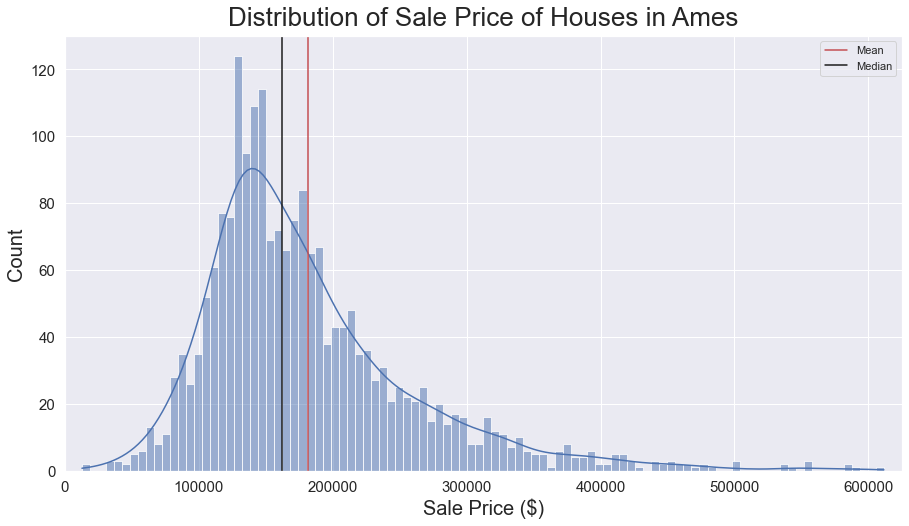

In [64]:
# Plot a histogram with sale price to visualise its distribution
plt.figure(figsize=(15, 8))
g = sns.histplot(train['saleprice'], color='b', bins=100, kde=True);
g.set_title('Distribution of Sale Price of Houses in Ames', y=1.01, fontsize=26);
g.set(xlim=(0,625000),ylim=(0,130));
plt.axvline(x=train["saleprice"].mean(),color="r",label="Mean")
plt.axvline(x=train["saleprice"].median(),color="k",label="Median")
g.set_xlabel("Sale Price ($)",fontsize=20)
g.set_ylabel("Count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right');

Based on the histogram above it is clear that the graph is positively skewed.

The mean 'saleprice' is 181,354, with a standard deviation of 79,331. The distribution of 'saleprice' is skewed to the right. The tail ends of the distribution curve indicates low frequency of the value and is indicative of outliers. Hence we will have to remove them in order to get a more accurate prediction in later stages.

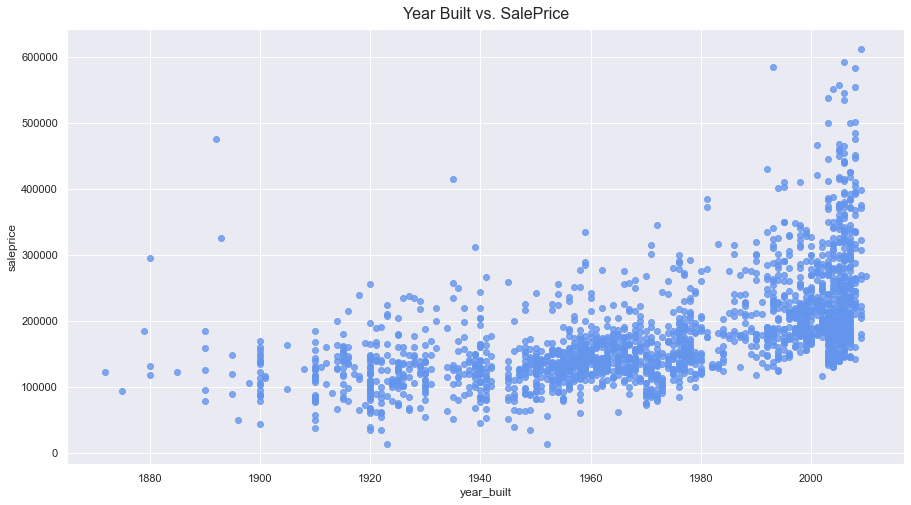

In [65]:
# Plotting year_built & year remod vs sale_price

plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='year_built', y='saleprice', fit_reg=False, color='cornflowerblue');
g.set_title('Year Built vs. SalePrice', fontsize=16, y=1.01);

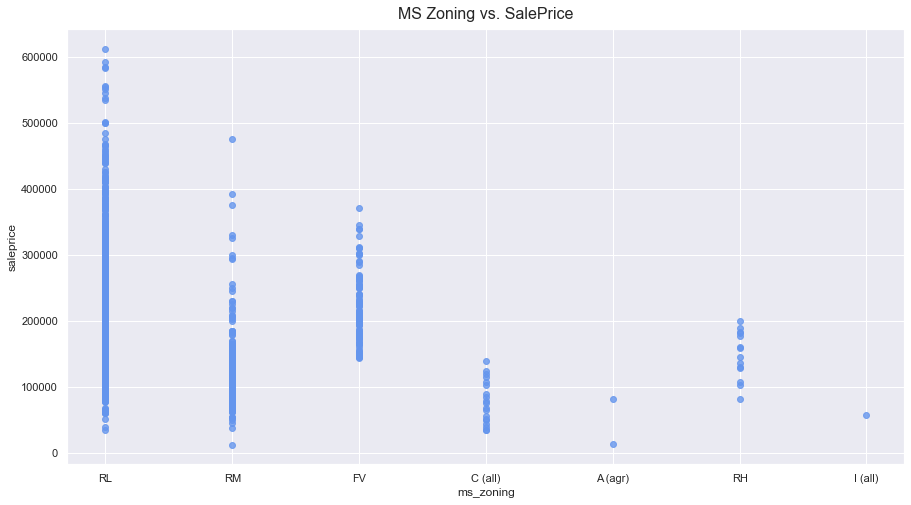

In [66]:
# Plotting year_built & year remod vs sale_price
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='ms_zoning', y='saleprice', fit_reg=False, color='cornflowerblue');
g.set_title('MS Zoning vs. SalePrice', fontsize=16, y=1.01);

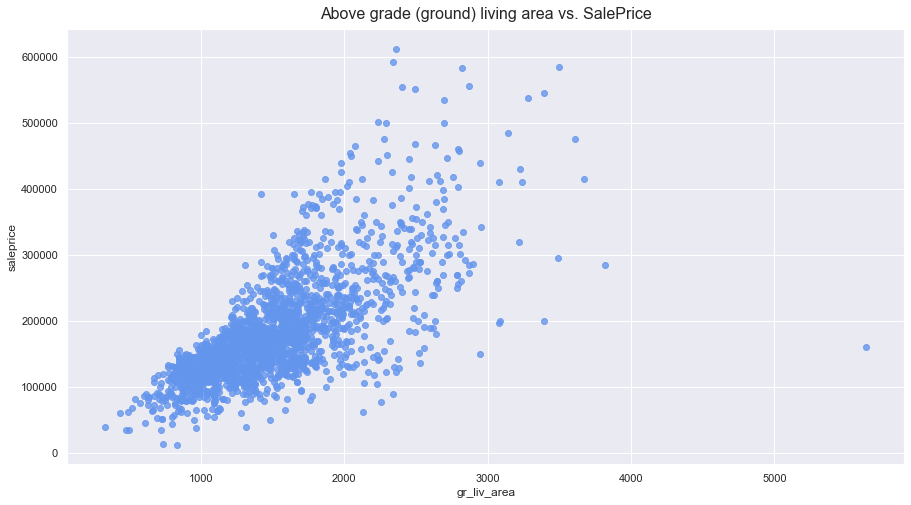

In [67]:
# Plotting gr_liv_area vs sale_price
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='gr_liv_area', y='saleprice', fit_reg=False, color='cornflowerblue');
g.set_title('Above grade (ground) living area vs. SalePrice', fontsize=16, y=1.01);

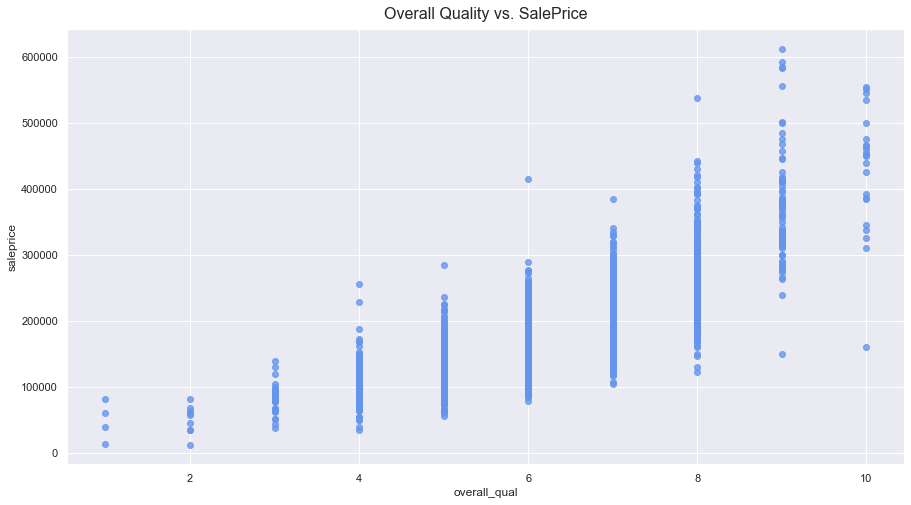

In [68]:
# Plotting gr_liv_area vs sale_price
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='overall_qual', y='saleprice', fit_reg=False, color='cornflowerblue');
g.set_title('Overall Quality vs. SalePrice', fontsize=16, y=1.01);

'gr_liv_area' was used as it is the total living area above ground and is approximately the sum of '1st_floor_sf' and '2nd_floor_sf'.

From the graph above we can see that there is 1 outlier with 'gr_liv_area' > 5,000sqft, with a very low psf price compared the other other larger areas.

This can affect the predictions of price of houses, we will hence have to remove them.

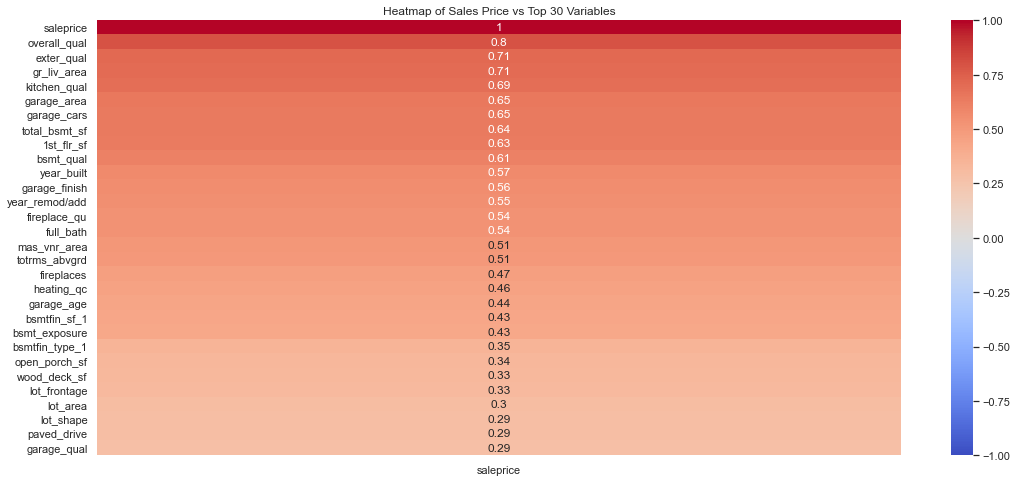

In [69]:
# Apply heatmap to view top features to use for regression
fig, ax = plt.subplots(figsize=(18,8)) # Using subplots to control figure size
plt.title('Heatmap of Sales Price vs Top 30 Variables')
sns.heatmap(train.corr().abs()[['saleprice']].sort_values('saleprice', ascending=False).head(30),
            vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);

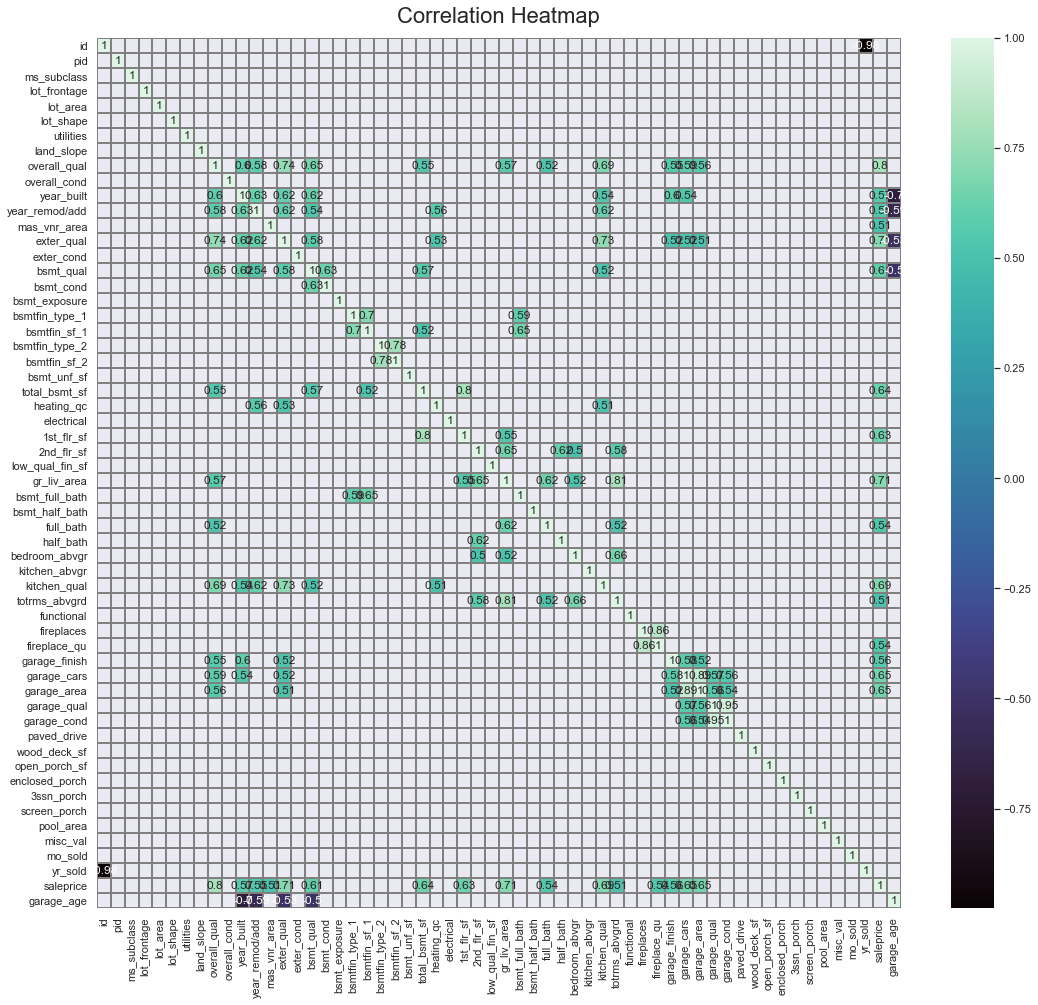

In [70]:
# This is the code for the masked heatmap. 
plt.figure(figsize=(18,16))
sns.heatmap(train.corr(),
            annot=True,
            linewidths=1,
            linecolor='grey',
            mask = (np.abs(train.corr()) <= 0.5),
            cmap='mako').set_title('Correlation Heatmap',
                                                          fontsize=22,
                                                          pad=15);

In [71]:
columns = list(train.columns.values)

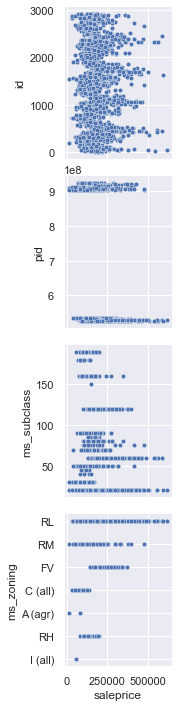

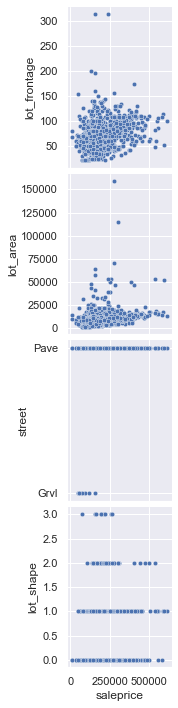

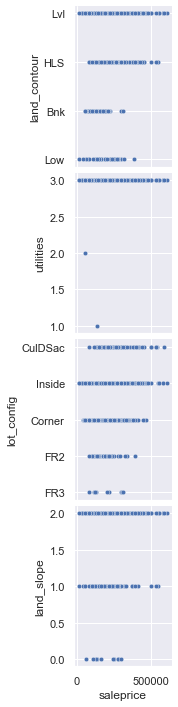

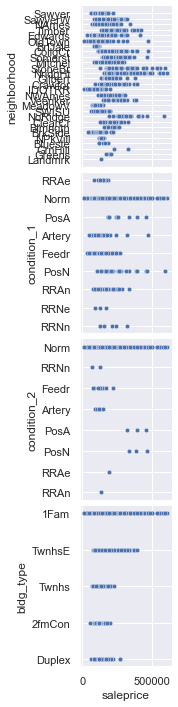

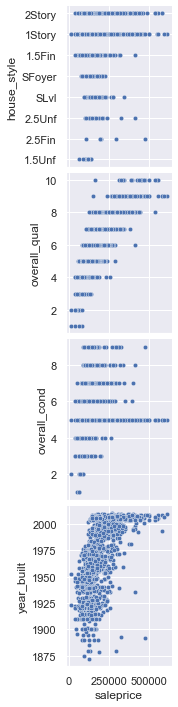

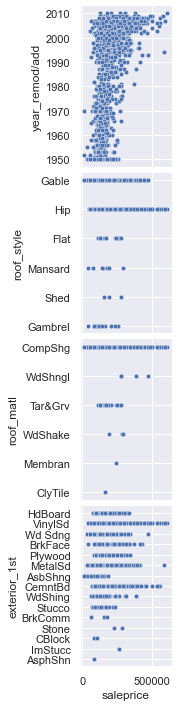

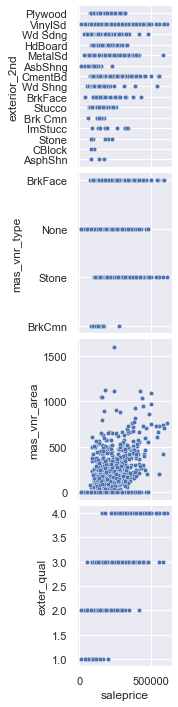

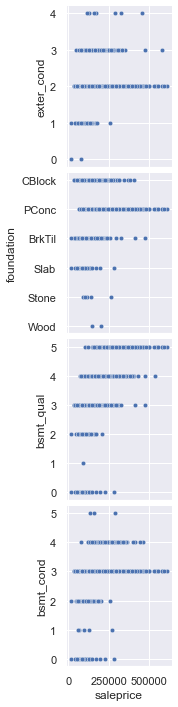

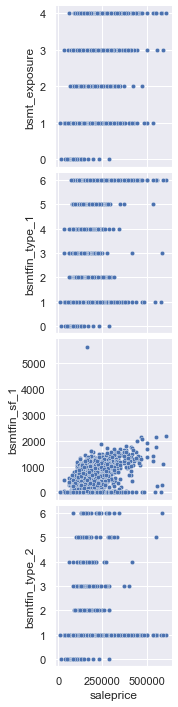

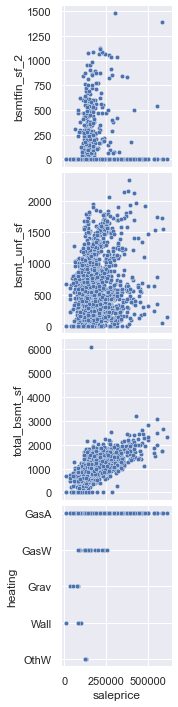

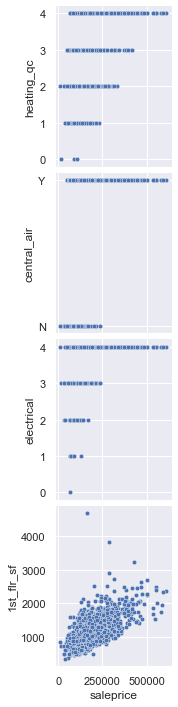

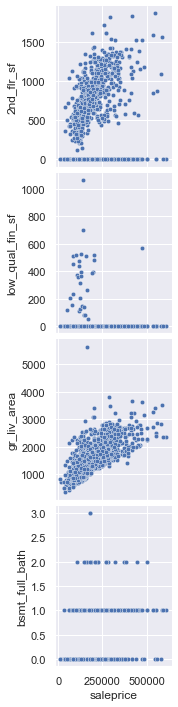

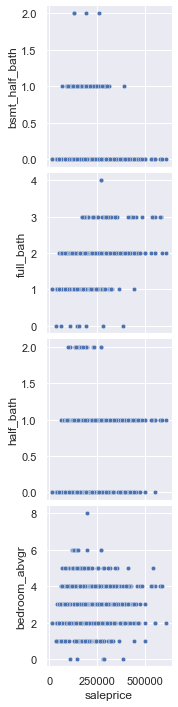

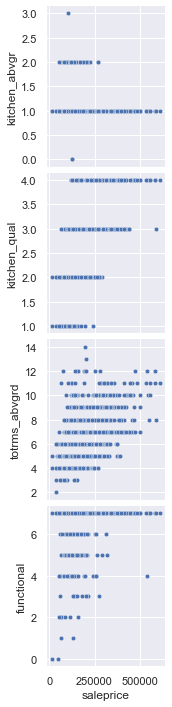

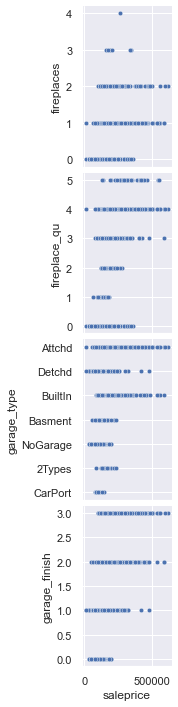

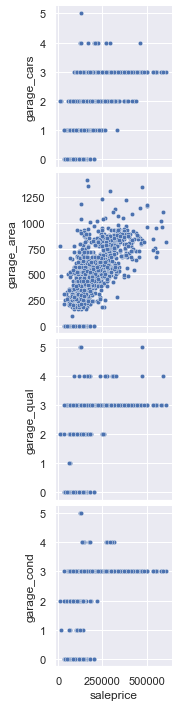

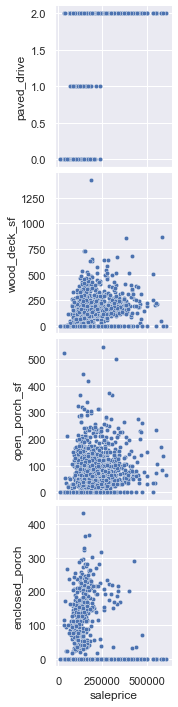

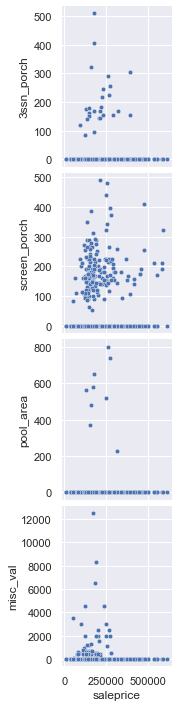

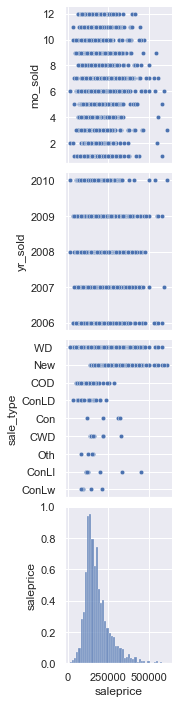

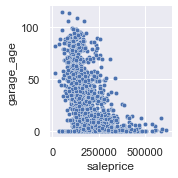

In [72]:
for i in range(0, len(columns), 4):
  (sns.pairplot(data=train, x_vars=['saleprice'], y_vars=columns[i:i+4], plot_kws={"s":20}))

## Feature Engineering

###  Making new columns

In [73]:
# new column for the house age, in a similar method as what was done for the garage age.
train['house_age'] = train['yr_sold'] - train['year_built']

In [74]:
# Checking for zero values in year_remod/add, if none, can proceed
train[train['year_remod/add'] == 0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_age,house_age


In [75]:
# column for the number of years till any remodeling or addition was done.
train['age_at_remod'] = train['yr_sold'] - train['year_remod/add']
# Adding up all baths in the property
train['total_baths'] = train['full_bath'] + train['half_bath'] + train['bsmt_full_bath'] + train['bsmt_half_bath']
# Making an overall garage term from interacting two garage-related features
train['garage_overall'] = train['garage_qual'] * train['garage_cars']

In [76]:
# See what has been created, and check if min, max and other summary statistics are logical:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_age,house_age,age_at_remod,total_baths,garage_overall
0,109,533352170,60,RL,68.98313,13517,Pave,1.0,Lvl,3.0,CulDSac,2.0,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,3.0,2.0,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,4.0,Y,4.0,725,754,0,1479,0.0,0.0,2,1,3,1,3.0,6,7.0,0,0.0,Attchd,2.0,2.0,475.0,3.0,3.0,2.0,0,44,0,0,0,0,0,3,2010,WD,130500,34.0,34,5,3.0,6.0
1,544,531379050,60,RL,43.00000,11492,Pave,1.0,Lvl,3.0,CulDSac,2.0,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,3.0,2.0,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,4.0,Y,4.0,913,1209,0,2122,1.0,0.0,2,1,4,1,3.0,8,7.0,1,3.0,Attchd,2.0,2.0,559.0,3.0,3.0,2.0,0,74,0,0,0,0,0,4,2009,WD,220000,12.0,13,12,4.0,6.0
2,153,535304180,20,RL,68.00000,7922,Pave,0.0,Lvl,3.0,Inside,2.0,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,3.0,CBlock,3.0,3.0,1.0,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,2.0,Y,4.0,1057,0,0,1057,1.0,0.0,1,0,3,1,3.0,5,7.0,0,0.0,Detchd,1.0,1.0,246.0,3.0,3.0,2.0,0,52,0,0,0,0,0,1,2010,WD,109000,57.0,57,3,2.0,3.0
3,318,916386060,60,RL,73.00000,9802,Pave,0.0,Lvl,3.0,Inside,2.0,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2.0,2.0,PConc,4.0,3.0,1.0,1.0,0.0,1.0,0.0,384.0,384.0,GasA,3.0,Y,4.0,744,700,0,1444,0.0,0.0,2,1,3,1,2.0,7,7.0,0,0.0,BuiltIn,3.0,2.0,400.0,3.0,3.0,2.0,100,0,0,0,0,0,0,4,2010,WD,174000,3.0,4,3,3.0,6.0
4,255,906425045,50,RL,82.00000,14235,Pave,1.0,Lvl,3.0,Inside,2.0,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,2.0,2.0,PConc,2.0,4.0,1.0,1.0,0.0,1.0,0.0,676.0,676.0,GasA,2.0,Y,4.0,831,614,0,1445,0.0,0.0,2,0,3,1,2.0,6,7.0,0,0.0,Detchd,1.0,2.0,484.0,3.0,3.0,0.0,0,59,0,0,0,0,0,3,2010,WD,138500,53.0,110,17,2.0,6.0


In [77]:
train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,garage_age,house_age,age_at_remod,total_baths,garage_overall
count,2044.000000,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000
mean,1473.597358,7.136665e+08,57.052348,68.978685,10046.318004,0.403620,2.998532,1.947162,6.108121,5.563601,1971.634051,1984.118885,98.039628,2.404110,2.086106,3.487769,2.929061,1.631115,3.566536,440.818982,1.275930,47.865460,565.560665,1054.245108,3.155577,3.885029,1162.358611,328.911448,5.531800,1496.801859,0.427593,0.063112,1.575342,0.370841,2.843933,1.043053,2.515166,6.430528,6.842466,0.590020,1.760274,1.723581,1.774462,472.773973,2.803816,2.811155,1.833170,93.661937,47.255871,22.545499,2.600294,16.568004,2.406067,43.433953,6.220157,2007.776419,181354.879648,27.639432,36.142368,23.657534,2.436888,5.290117
std,843.691647,1.886891e+08,42.872938,21.245197,6720.739049,0.566659,0.049449,0.244663,1.423718,1.105925,30.154994,21.036017,172.715577,0.587105,0.373397,0.902136,0.572973,1.077937,2.124600,454.512104,0.950661,164.950518,443.771177,438.753766,0.964501,0.403109,386.931878,425.687861,51.155263,494.627117,0.522749,0.251144,0.548837,0.501052,0.827576,0.210134,0.665392,1.550762,0.684517,0.638324,1.806408,0.898910,0.764172,215.267957,0.719741,0.714546,0.535619,128.307945,65.736548,59.788356,25.272344,57.464256,37.846982,435.007394,2.744186,1.312022,79331.642114,25.152003,30.188424,21.020050,0.940953,2.345047
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,753.750000,5.284582e+08,20.000000,60.000000,7500.000000,0.000000,3.000000,2.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,219.000000,793.000000,2.000000,4.000000,879.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,5.000000,7.000000,0.000000,0.000000,1.000000,1.000000,319.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,5.000000,7.000000,4.000000,2.000000,3.000000
50%,1480.500000,5.354532e+08,50.000000,68.983130,9402.500000,0.000000,3.000000,2.000000,6.000000,5.000

Looking at the correlations with sale price of what we have created:

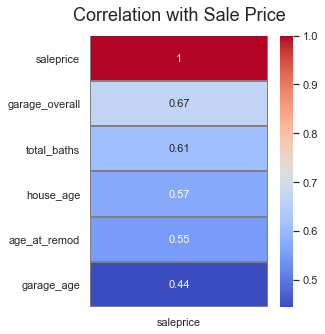

In [78]:
df_sel = train.loc[:,'saleprice':]
plt.figure(figsize=(4,5))
sns.heatmap(df_sel.corr()[['saleprice']].abs().sort_values(by='saleprice', ascending=False),
            annot=True,
            annot_kws={'size': 11},
            linewidths=1,
            linecolor='grey',
            cmap='coolwarm').set_title('Correlation with Sale Price',
                                                          fontsize=18,
                                                          pad=15);

# Dropping outliers

Dropping the outlier house:

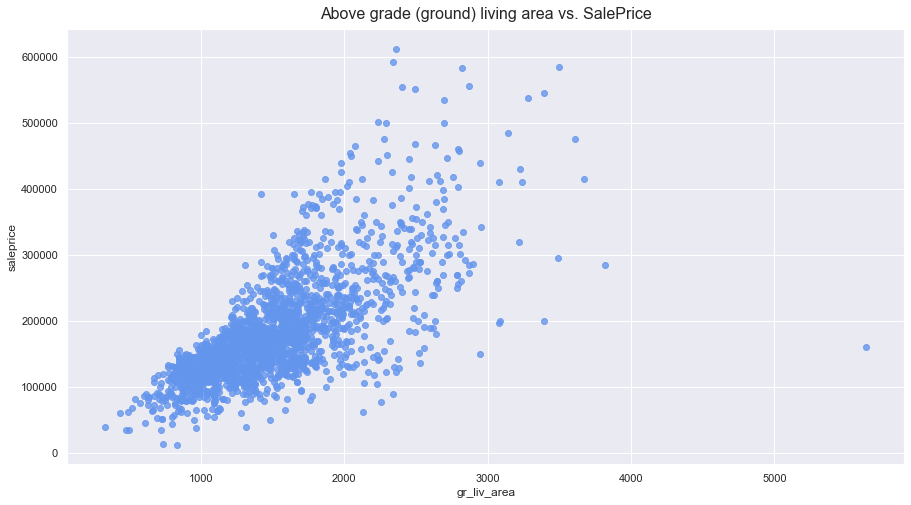

In [79]:
# Plotting gr_liv_area vs sale_price
plt.figure(figsize=(15, 8))
g = sns.regplot(data = train , x='gr_liv_area', y='saleprice', fit_reg=False, color='cornflowerblue');
g.set_title('Above grade (ground) living area vs. SalePrice', fontsize=16, y=1.01);

In [80]:
train[train['gr_liv_area'] > 5000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_age,house_age,age_at_remod,total_baths,garage_overall
960,1499,908154235,60,RL,313.0,63887,Pave,3.0,Bnk,3.0,Corner,2.0,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,4.0,2.0,PConc,5.0,3.0,4.0,6.0,5644.0,1.0,0.0,466.0,6110.0,GasA,4.0,Y,4.0,4692,950,0,5642,2.0,0.0,2,1,3,1,4.0,12,7.0,3,4.0,Attchd,3.0,2.0,1418.0,3.0,3.0,2.0,214,292,0,0,0,480,0,1,2008,New,160000,0.0,0,0,5.0,6.0


In [81]:
train.drop(train[train['gr_liv_area'] > 5000].index, inplace=True)

## Dropping numerical columns with low correlation with saleprice

In [82]:
# setting variable to contain columns that have absolute correlation < 0.45
saleprice_abs_corr = train.corr()['saleprice'].abs()
to_drop = list(saleprice_abs_corr[saleprice_abs_corr < 0.45].index)
# The number of columns that will be dropped
len(to_drop)

39

In [83]:
# Drops the cols
train = train.drop(columns=to_drop)
# No. of remaining columns
len(train.columns)

42

## Dropping columns that give low coefficients in the Ridge model 

Below, we drop these columns.

These columns are actually identified after the Ridge model was run and the coefficients obtained. 

Droppping increased the model performance.

In [84]:
train.drop(columns=['exterior_2nd', 'condition_2', 'ms_zoning'], inplace=True)

## Checking for multicollinearity in the numerical features 

We set the threshold as: correlations between features with r > 0.75 are of concern to us.

In [85]:
# Generate a correlation matrix (absolute values)
train_feat_corr = train.corr().abs()

# Drop the row and column for 'saleprice' as we only want to study the features (X)
train_feat_corr.drop(labels='saleprice', axis=0, inplace=True)
train_feat_corr.drop(labels='saleprice', axis=1, inplace=True)

# Create a mask for the upper triange
upper_tri_mask = np.triu(np.ones_like(train_feat_corr, dtype=bool))

# Get the masked correlation matrix
train_feat_corr = train_feat_corr.mask(upper_tri_mask)

# Reshape the correlation matrix into a stacked format
corr_list = train_feat_corr.stack().sort_values(ascending=False)

# Convert the stacked data into a DataFrame
corr_list = pd.DataFrame(corr_list).reset_index()

# Name the columns of the created DataFrame
corr_list.columns = 'feature_1', 'feature_2', '1_2_abs_corr'

# Get only the pairwise correlations that meet the specified condition
corr_list = corr_list[corr_list['1_2_abs_corr'] > 0.75]

# Generate the correlation of the features in the list to the target variable
for row in corr_list.index:
    corr_list.loc[row, '1_y_corr'] = train.corr().abs()['saleprice'][corr_list.loc[row, 'feature_1']]
    corr_list.loc[row, '2_y_corr'] = train.corr().abs()['saleprice'][corr_list.loc[row, 'feature_2']]

corr_list

,feature_1,feature_2,1_2_abs_corr,1_y_corr,2_y_corr
0,house_age,year_built,0.999054,0.572028,0.571976
1,age_at_remod,year_remod/add,0.998053,0.551938,0.550534
2,garage_overall,garage_cars,0.986520,0.667549,0.648383
3,garage_area,garage_cars,0.896963,0.655061,0.648383
4,garage_overall,garage_area,0.896036,0.667549,0.655061
5,fireplace_qu,fireplaces,0.860692,0.539093,0.473624
6,totrms_abvgrd,gr_liv_area,0.812626,0.509762,0.719694
7,1st_flr_sf,total_bsmt_sf,0.792071,0.648273,0.666429


In [86]:
# Choose the columns to drop based on logical selection. 
# We only need to drop one, and so we drop the one with less corr to sale price.

train.drop(columns=['year_built',
                    'year_remod/add',
                    'garage_cars',
                    'garage_area',
                    'fireplaces',
                    'totrms_abvgrd',
                    '1st_flr_sf'], inplace=True)

### Data exporting

In [87]:
# export finalised dataset
train.to_csv('../datasets/train_final.csv', index=False)

### Data Dictionary
A description of the variables in the original datasets, train.csv.

A description of the variables in the finalised dataset used for analysis in this notebook is given below.

|Feature       |Type   |Dataset    |Description                                                                    |
|:-------------|-------|-----------|:------------------------------------------------------------------------------|
|age_at_remod  |int64  |train-final|Number of years till any remodeling or addition done                           |
|bldg_type     |object |train-final|Type of dwelling                                                               |
|bsmt_qual     |float64|train-final|Evaluates the height of the basement                                           |
|central_air   |object |train-final|Central air conditioning                                                       |
|condition_1   |object |train-final|Proximity to various conditions                                                |
|exter_qual    |float64|train-final|Evaluates the quality of the material on the exterior                          |
|exterior_1st  |object |train-final|Exterior covering on house                                                     |
|fireplace_qu  |float64|train-final|Fireplace quality                                                              |
|foundation    |object |train-final|Type of foundation                                                             |
|full_bath     |int64  |train-final|Full bathrooms above grade                                                     |
|garage_overall|float64|train-final|Interaction feature obtained from the product of garage quality and garage cars|
|garage_type   |object |train-final|Garage location                                                                |
|gr_liv_area   |int64  |train-final|Above grade (ground) living area square feet                                   |
|heating       |object |train-final|Type of heating                                                                |
|heating_qc    |float64|train-final|Heating quality and condition                                                  |
|house_age     |int64  |train-final|Age of house                                                                   |
|house_style   |object |train-final|Style of dwelling                                                              |
|kitchen_qual  |float64|train-final|Kitchen quality                                                                |
|land_contour  |object |train-final|Flatness of the property                                                       |
|lot_config    |object |train-final|Lot configuration                                                              |
|mas_vnr_area  |float64|train-final|Masonry veneer area in square feet                                             |
|mas_vnr_type  |object |train-final|Masonry veneer type                                                            |
|neighborhood  |object |train-final|Physical locations within Ames city limits                                     |
|overall_qual  |int64  |train-final|Rates the overall material and finish of the house                             |
|roof_matl     |object |train-final|Roof material                                                                  |
|roof_style    |object |train-final|Type of roof                                                                   |
|sale_type     |object |train-final|Type of sale                                                                   |
|saleprice     |int64  |train-final|Sale price $$                                                                  |
|street        |object |train-final|Type of road access to property                                                |
|total_baths   |float64|train-final|Total Number of bathrooms                                                      |
|total_bsmt_sf |float64|train-final|Total square feet of basement area                                             |

### Converting categorical (nominal) datatypes to numerical format for modelling
We set it to not drop the first dummy column as it increased Lasso and Ridge performance. 

In [88]:
train = pd.get_dummies(train, drop_first=False)
train.head()

,overall_qual,mas_vnr_area,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,gr_liv_area,full_bath,kitchen_qual,fireplace_qu,garage_finish,saleprice,house_age,age_at_remod,total_baths,garage_overall,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NoGarage,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,6,289.0,3.0,3.0,725.0,4.0,1479,2,3.0,0.0,2.0,130500,34,5,3.0,6.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7,132.0,3.0,4.0,913.0,4.0,2122,2,3.0,3.0,2.0,220000,13,12,4.0,6.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5,0.0,2.0,3.0,1057.0,2.0,1057,1,3.0,0.0,1.0,109000,57,3,2.0,3.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5,0.0,2.0,4.0,384.0,3.0,1444,2,2.0,0.0,3.0,174000,4,3,3.0,6.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,6,0.0,2.0,2.0,676.0,2.0,1445,2,2.0,0.0,1.0,138500,110,17,2.0,6.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2050
Columns: 136 entries, overall_qual to sale_type_WD 
dtypes: float64(10), int64(6), uint8(120)
memory usage: 510.8 KB


DatatTypes are all numerical now

## Checking for multicollinearity in the numerical features
We set the threshold as: correlations between features with r > 0.75 are of concern to us.

In [90]:
# Generate a correlation matrix (absolute values)
train_feat_corr = train.corr().abs()

# Drop the row and column for 'saleprice' as we only want to study the features (X)
train_feat_corr.drop(labels='saleprice', axis=0, inplace=True)
train_feat_corr.drop(labels='saleprice', axis=1, inplace=True)

# Create a mask for the upper triange
upper_tri_mask = np.triu(np.ones_like(train_feat_corr, dtype=bool))

# Get the masked correlation matrix
train_feat_corr = train_feat_corr.mask(upper_tri_mask)

# Reshape the correlation matrix into a stacked format
corr_list = train_feat_corr.mask(upper_tri_mask).stack().sort_values(ascending=False)

# Convert the stacked data into a DataFrame
corr_list = pd.DataFrame(corr_list).reset_index()

# Name the columns of the created DataFrame
corr_list.columns = 'feature_1', 'feature_2', '1_2_abs_corr'

# Get only the pairwise correlations that meet the specified condition
corr_list = corr_list[corr_list['1_2_abs_corr'] > 0.75]

# Generate the correlation of the features in the list to the target variable
for row in corr_list.index:
    corr_list.loc[row, '1_y_corr'] = train.corr().abs()['saleprice'][corr_list.loc[row, 'feature_1']]
    corr_list.loc[row, '2_y_corr'] = train.corr().abs()['saleprice'][corr_list.loc[row, 'feature_2']]

corr_list

,feature_1,feature_2,1_2_abs_corr,1_y_corr,2_y_corr
0,central_air_Y,central_air_N,1.000000,0.277284,0.277284
1,street_Pave,street_Grvl,1.000000,0.069821,0.069821
2,roof_style_Hip,roof_style_Gable,0.948206,0.267016,0.251054
3,mas_vnr_type_None,mas_vnr_type_BrkFace,0.824365,0.411834,0.257498
4,roof_matl_Tar&Grv,roof_style_Flat,0.786279,0.007137,0.010337
5,heating_GasW,heating_GasA,0.775994,0.037714,0.093938
6,foundation_PConc,foundation_CBlock,0.773273,0.529180,0.355644
7,roof_matl_Tar&Grv,roof_matl_CompShg,0.772685,0.007137,0.071869


It's all dummy variables. Will leave as it is. Expected from OHE. Can it be safely ignored? This link says yes https://statisticalhorizons.com/multicollinearity.

# Pre-Processing & Modelling

## Features-Target Definition

In [91]:
# create a copy of the dataset with just the features needed for modelling
X = train.drop('saleprice', axis=1).copy()
y = train['saleprice'].copy()

## Train Test Split

In [92]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## Feature Scaling

In [93]:
# perform scaling data for Lasso and Ridge
scaler = StandardScaler()
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

## Model Evaluation and selection

In [94]:
# instantiate linear model
linear = LinearRegression()

# instantiate ridgecv model
ridgecv = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)

# instantiate lassocv model
lassocv = LassoCV(n_alphas=200, cv=5)

In [95]:
def regression_defaults(df, target_col, rand_state, cv_folds):
    '''
    A function to print the cross-validated R-squared scores 
    of Linear, Lasso and Ridge Regression models on the specified data 
    using the default parameters. 
    '''
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rand_state)
        
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_scores = cross_val_score(lr, X_train, y_train, cv=cv_folds)
    print(f"Linear Regression Cross-Validatied R-Squared score: {lr_scores.mean()}")
    
    # Scaling the data for Lasso and Ridge 
    ss = StandardScaler()
    ss.fit(X_train)
    X = ss.transform(X_train)
    
    lassoRegressor = LassoCV()
    lassoRegressor.fit(X_train, y_train)
    lasso_scores = cross_val_score(lassoRegressor, X_train, y_train, cv=cv_folds)
    print(f"Lasso Regression cross-validated R-squared score: {lasso_scores.mean()}")

    ridge = RidgeCV()
    ridge.fit(X_train, y_train)
    ridge_scores = cross_val_score(ridge, X_train, y_train, cv=cv_folds)
    print(f"Ridge Regression cross-validated R-squared score: {ridge_scores.mean()}")
    
    # Reversing the data scaling so we get back our normal DataFrame
    X_train = ss.inverse_transform(X_train)

In [96]:
regression_defaults(train, 'saleprice', 123, 5)

Linear Regression Cross-Validatied R-Squared score: 0.8772175679160625
Lasso Regression cross-validated R-squared score: 0.7793602699251396
Ridge Regression cross-validated R-squared score: 0.8842870302306979


In [97]:
# fit linear model on training data
linear = linear.fit(X_train, y_train)

# predict targets for training dataset and testing dataset with fitted linear model
y_pred_train = linear.predict(X_train)
y_pred_test = linear.predict(X_test)

# get scores on training dataset and testing dataset with fitted linear model
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('Linear Regression Training R-Squared:', r2_train)
print('Linear Regression Testing R-Squared:', r2_test)
print('Linear Regression Training Mean Squared Error:', mse_train)
print('Linear Regression Testing Mean Squared Error:', mse_test)
print('Linear Regression Training Mean Squared Error:', rmse_train)
print('Linear Regression Testing Mean Squared Error:', rmse_test)
print('')

# fit ridgecv model on training data
ridgecv = ridgecv.fit(Z_train, y_train)

# predict targets for training dataset and testing dataset with fitted ridgecv model
y_pred_train = ridgecv.predict(Z_train)
y_pred_test = ridgecv.predict(Z_test)

# get scores on training dataset and testing dataset with fitted ridgecv model
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('Ridge Regression Training R-Squared:', r2_train)
print('Ridge Regression Testing R-Squared:', r2_test)
print('Ridge Regression Training Mean Squared Error:', mse_train)
print('Ridge Regression Testing Mean Squared Error:', mse_test)
print('Ridge Regression Training Mean Squared Error:', rmse_train)
print('Ridge Regression Testing Mean Squared Error:', rmse_test)
print('')

# fit lassocv model on training data
lassocv = lassocv.fit(Z_train, y_train)

# predict targets for training dataset and testing dataset with fitted lassocv model
y_pred_train = lassocv.predict(Z_train)
y_pred_test = lassocv.predict(Z_test)

# get scores on training dataset and testing dataset with fitted lassocv model
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('Lasso Regression Training R-Squared:', r2_train)
print('Lasso Regression Testing R-Squared:', r2_test)
print('Lasso Regression Training Mean Squared Error:', mse_train)
print('Lasso Regression Testing Mean Squared Error:', mse_test)
print('Lasso Regression Training Mean Squared Error:', rmse_train)
print('Lasso Regression Testing Mean Squared Error:', rmse_test)

Linear Regression Training R-Squared: 0.9070963481487242
Linear Regression Testing R-Squared: 0.8957110961825666
Linear Regression Training Mean Squared Error: 607947246.4730563
Linear Regression Testing Mean Squared Error: 575112778.5860035
Linear Regression Training Mean Squared Error: 24656.58626965737
Linear Regression Testing Mean Squared Error: 23981.50909734422

Ridge Regression Training R-Squared: 0.905358096598554
Ridge Regression Testing R-Squared: 0.9016546176648521
Ridge Regression Training Mean Squared Error: 619322097.9729221
Ridge Regression Testing Mean Squared Error: 542336567.2237033
Ridge Regression Training Mean Squared Error: 24886.182872689056
Ridge Regression Testing Mean Squared Error: 23288.120731903276

Lasso Regression Training R-Squared: 0.9040331640750296
Lasso Regression Testing R-Squared: 0.9043080336957063
Lasso Regression Training Mean Squared Error: 627992253.1647619
Lasso Regression Testing Mean Squared Error: 527704008.91317874
Lasso Regression Train

## Decision:

Looking at the scores:

- RidgeCV scored the highest R-Squared out of the 3 models during cross validation.
- RidgeCV scored the intermediate R-Squared and highest Mean Squared Error on the training dataset out of the 3 models.
- RidgeCV scored the intermediate R-Squared and the intermediate Mean Squared Error on the testing dataset out of the 3 models.

RidgeCV will be selected as the model of choice to minimise the risk of overfitting and to obtain the best performance.

# Final Model

In [98]:
# perform feature scaling
scaler = StandardScaler()
Z = scaler.fit_transform(X)

In [99]:
# instantiate Ridgecv model
Ridgecv_final = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)

In [100]:
# fit model of choice: Ridgecv model
Ridgecv_final = Ridgecv_final.fit(Z, y)

In [101]:
# determine optimal alpha of fitted Ridgecv model
print('Optimal Alpha:', Ridgecv_final.alpha_)

Optimal Alpha: 76.63410868007459


In [102]:
# determine intercept of fitted Ridgecv model
print('Intercept:', Ridgecv_final.intercept_)

Intercept: 181365.3323543808


In [103]:
# determine coefficients of fitted Ridgecv model
Ridgecv_final_coefs = pd.DataFrame({'Feature': X.columns, 
                                    'Coefficients': Ridgecv_final.coef_, 
                                    '|Coefficients|': np.abs(Ridgecv_final.coef_)})
Ridgecv_final_coefs = Ridgecv_final_coefs.sort_values('|Coefficients|', ascending=False)
Ridgecv_final_coefs

,Feature,Coefficients,|Coefficients|
6,gr_liv_area,20919.282697,20919.282697
0,overall_qual,12318.329359,12318.329359
4,total_bsmt_sf,11277.252105,11277.252105
13,total_baths,9134.970554,9134.970554
1,mas_vnr_area,7703.026520,7703.026520
14,garage_overall,7549.851546,7549.851546
45,neighborhood_NridgHt,7266.475580,7266.475580
8,kitchen_qual,6214.087110,6214.087110
2,exter_qual,6128.279462,6128.279462
51,neighborhood_StoneBr,5874.304962,5874.304962


<AxesSubplot:title={'center':'Bar Plot Of Model Coefficients'}>

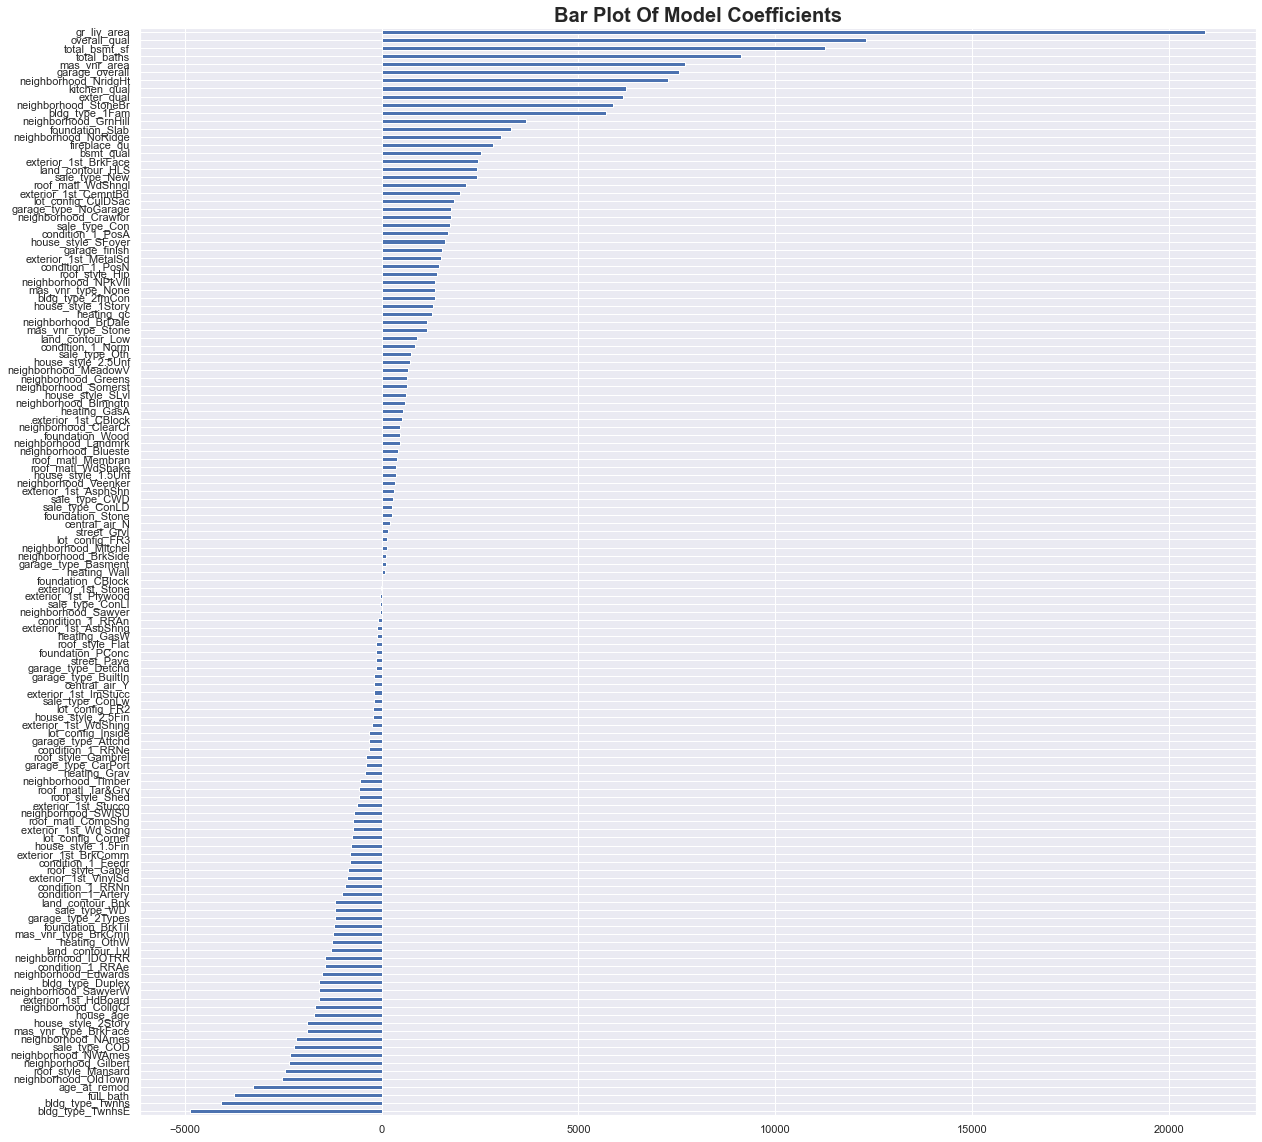

In [104]:
# visualise coefficients of fitted Ridgecv model
plt.title('Bar Plot Of Model Coefficients', fontweight='semibold', fontsize=20)
pd.Series(Ridgecv_final.coef_, index=X.columns).sort_values(ascending=True).plot.barh(figsize=(20, 20))

In [105]:
# predict targets for entire dataset with fitted lassocv model
y_pred = Ridgecv_final.predict(Z)

In [106]:
# get scores on entire dataset with fitted lassocv model
r2 = metrics.r2_score(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('Ridge Regression R-Squared:', r2)
print('Ridge Regression Mean Squared Error:', mse)
print('Ridge Root Mean Squared Error:', rmse)

Ridge Regression R-Squared: 0.9070579195809607
Ridge Regression Mean Squared Error: 584911104.1982758
Ridge Root Mean Squared Error: 24184.93548054813


Observation:
The LassoCV model is able to explain 82.9% of the variability in the housing sale price with the housing features.
The LassoCV model has a calculated mean of the squared distance between true values and predicted values of 1,073,902,381.

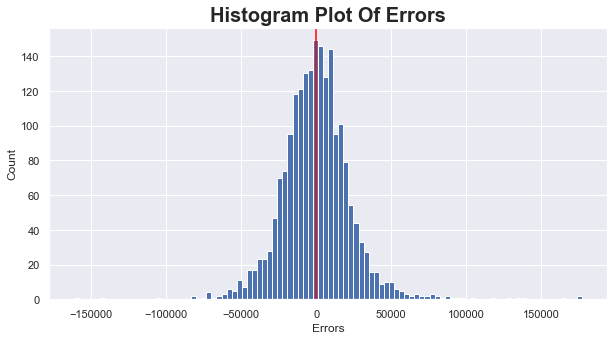

In [107]:
# check for normality of errors (residuals)
plt.figure(figsize=(10, 5))
plt.title('Histogram Plot Of Errors', fontweight='semibold', fontsize=20)
plt.xlabel('Errors')
plt.ylabel('Count')
plt.axvline(0, color='red')
plt.hist(y - y_pred, bins=100);

### Observation: 
The errors appear to be normally distributed. This is ideal.

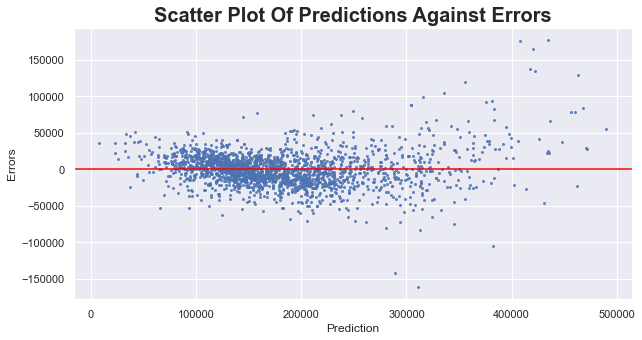

In [108]:
# check for equal variance of errors (residuals) aka homoscedasticity
plt.figure(figsize=(10, 5))
plt.title('Scatter Plot Of Predictions Against Errors', fontweight='semibold', fontsize=20)
plt.xlabel('Prediction')
plt.ylabel('Errors')
plt.axhline(0, color='red')
plt.scatter(y_pred, y - y_pred, s=4, alpha=0.8);

### Observation: 
The errors do not appear to have equal variance. This is not ideal.

## Null Model

In [109]:
# devise null model for dataset
print('Baseline Target (Mean Sale Price) of Dataset:', y.mean())

# make into an array for scoring
y_mean = np.full(y.shape, y.mean())

Baseline Target (Mean Sale Price) of Dataset: 181365.3323543808


In [110]:
# get scores on dataset with null model
r2 = metrics.r2_score(y, y_mean)
mse = metrics.mean_squared_error(y, y_mean)
rmse = np.sqrt(metrics.mean_squared_error(y, y_mean))
print('Baseline R-Squared:', r2)
print('Baseline Mean Squared Error:', mse)
print('Baseline Root Mean Squared Error:', rmse)

Baseline R-Squared: 0.0
Baseline Mean Squared Error: 6293286114.977647
Baseline Root Mean Squared Error: 79330.23455768706


### Observation: 
A comparison of the scores between the RidgeCV model and the Null model shows that the LassoCV model has outperformed the the Null model by achieving a higher R-Squared and a lower Mean Squared Error.

## Kaggle Prediction


In [111]:
#Import test data
test = pd.read_csv('../datasets/test.csv')
test.columns = test.columns.str.lower().str.replace(' ', '_')

#Check size of test .  We see there are 879 houses in the test .
test.shape
print(test.shape)
test.head(10) 

(878, 80)


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,294,Unf,0,252,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1972.0,Unf,1,286,TA,TA,Y,0,0,64,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1958,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,869,869,GasA,TA,Y,SBrkr,1093,0,0,1093,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1959.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1977,1989,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Av,ALQ,196,Unf,0,1072,1268,GasA,TA,Y,SBrkr,1268,0,0,1268,0,0,1,1,3,1,Gd,5,Typ,0,NaN,Detchd,1978.0,Unf,1,252,TA,TA,Y,173,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,840,0,1680,0,0,2,1,2,1,Gd,3,Typ,0,NaN,Attchd,2004.0,RFn,2,588,TA,TA,Y,0,111,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,N

In [112]:
 #This code defines a function that can be edited as necessary, 
 #that applies all data processing changes to new test data.
 
 def changes_to_dataframe(data):
     data.drop(columns='pool_qc', inplace=True)
     data.drop(columns='misc_feature', inplace=True)
     data.drop(columns='alley', inplace=True)
     data.drop(columns='fence', inplace=True)
     data['fireplace_qu'] = data['fireplace_qu'].fillna('NoFireplace')
     data['lot_frontage'].replace(np.nan, data['lot_frontage'].mean(), inplace=True)
     data['mas_vnr_area'] = data['mas_vnr_area'].fillna(0.0)
     bsmt_num_null = ['bsmtfin_sf_1',
                  'bsmtfin_sf_2',
                  'bsmt_unf_sf',
                  'total_bsmt_sf',
                  'bsmt_full_bath',
                  'bsmt_half_bath']
     for col in bsmt_num_null: 
         data[col] = data[col].fillna(0.0)
     data.dropna(subset=['garage_cars'], inplace=True)
     data['garage_yr_blt'] = data['garage_yr_blt'].fillna(0.0)
     data['garage_age'] = data['yr_sold'] - data['garage_yr_blt'][data['garage_yr_blt'] != 0]
     data['garage_age'] = data['garage_age'].fillna(0)
     data.drop(columns='garage_yr_blt', inplace=True)
     data['mas_vnr_type'] = data['mas_vnr_type'].fillna('None')
     data.drop(data[(data['bsmt_exposure'].isna()) & (data['bsmt_qual'].notna())].index, inplace=True)
     data.drop(data[(data['bsmtfin_type_2'].isna()) & (data['bsmt_qual'].notna())].index, inplace=True)
     
     bsmt_cat_null = ['bsmt_qual',
                      'bsmt_cond',
                      'bsmt_exposure',
                      'bsmtfin_type_1',
                      'bsmtfin_type_2',]
     
     for col in bsmt_cat_null: 
         data[col] = data[col].fillna('NoBasement')
         
     garage_cat_null = ['garage_type',
                        'garage_finish',
                        'garage_qual',
                        'garage_cond']
 
     for col in garage_cat_null: 
         data[col] = data[col].fillna('NoGarage')
     
     return data



In [113]:
#Applies changes to test 
test = changes_to_dataframe(test)

#Checks for null values
test.isnull().sum().sum()
print('Missing Values:',test.isnull().sum().sum())

test[test.loc[:, test.isna().any()].select_dtypes(include='object').columns].isna().sum()

Missing Values: 1


electrical    1
dtype: int64

In [114]:
test[test['electrical'].isna()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,garage_age
634,1578,916386080,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NoFireplace,BuiltIn,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,1.0


In [115]:
test.drop([634], axis=0, inplace=True)

In [116]:
test.isnull().sum().sum()
print('Missing Values:',test.isnull().sum().sum())

Missing Values: 0


In [117]:
# make a list of the relevant columns
cat_ord_cols = ['lot_shape',
                'utilities',
                'land_slope',
                'exter_qual',
                'exter_cond',
                'bsmt_qual',
                'bsmt_cond',
                'bsmt_exposure',
                'bsmtfin_type_1',
                'bsmtfin_type_2',
                'heating_qc',
                'electrical',
                'kitchen_qual',
                'functional',
                'fireplace_qu',
                'garage_finish',
                'garage_qual',
                'garage_cond',
                'paved_drive']

In [118]:
    # specify the mappings for the OrdinalEncoder in lists:
    lot_shape_cats = ['Reg', 'IR1', 'IR2', 'IR3']
    utilities_cats = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
    land_slope_cats = ['Sev', 'Mod', 'Gtl']
    exter_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    exter_cond_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    bsmt_qual_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    bsmt_cond_cats = ['NoBasement', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    bsmt_exposure_cats = ['NoBasement', 'No', 'Mn', 'Av', 'Gd']
    bsmtfin_type1_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
    bsmtfin_type2_cats = ['NoBasement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
    heating_qc_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    electrical_cats = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
    kitchen_qual_cats = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    functional_cats = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
    fireplace_qu_cats = ['NoFireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    garage_finish_cats = ['NoGarage', 'Unf', 'RFn', 'Fin']
    garage_qual_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    garage_cond_cats = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
    paved_drive_cats = ['N', 'P', 'Y']

In [119]:
enc = OrdinalEncoder(categories = ordinal_cats)
test[cat_ord_cols] = enc.fit_transform(test[cat_ord_cols])

In [120]:
# new column for the house age, in a similar method as what was done for the garage age.
test['house_age'] = test['yr_sold'] - test['year_built']
# column for the number of years till any remodeling or addition was done.
test['age_at_remod'] = test['yr_sold'] - test['year_remod/add']
# Adding up all baths in the property
test['total_baths'] = test['full_bath'] + test['half_bath'] + test['bsmt_full_bath'] + test['bsmt_half_bath']
# Making an overall garage term from interacting two garage-related features
test['garage_overall'] = test['garage_qual'] * test['garage_cars']

In [121]:
# drop unnecessary columns like on train dataset
test.drop(columns=['exterior_2nd', 'condition_2', 'ms_zoning'], inplace=True)
test.drop(columns=['year_built',
                    'year_remod/add',
                    'garage_cars',
                    'garage_area',
                    'fireplaces',
                    'totrms_abvgrd',
                    '1st_flr_sf'], inplace=True)
test.isnull().sum().sum()
print('Missing Values:',test.isnull().sum().sum())

Missing Values: 0


In [122]:
# export finalised dataset
test.to_csv('../datasets/test_final.csv', index=False)

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2050
Columns: 136 entries, overall_qual to sale_type_WD 
dtypes: float64(10), int64(6), uint8(120)
memory usage: 510.8 KB


In [124]:
x_k = test[['street',
        'land_contour',
        'lot_config',
        'neighborhood',
        'condition_1',
        'bldg_type',
        'house_style',
        'overall_qual',
        'roof_style',
        'roof_matl',
        'exterior_1st',
        'mas_vnr_type',
        'mas_vnr_area',
        'exter_qual',
        'foundation',
        'bsmt_qual',
        'total_bsmt_sf',
        'heating',
        'heating_qc',
        'central_air',
        'gr_liv_area',
        'full_bath',
        'kitchen_qual',
        'fireplace_qu',
        'garage_type',
        'sale_type',
        'house_age',
        'age_at_remod',
        'total_baths',
        'garage_overall']].copy()


In [125]:
# one-hot encode categorical columns
x_k = pd.get_dummies(test, drop_first=False)

In [126]:
# perform feature scaling
Z = scaler.fit_transform(X)
# instantiate Ridgecv model
Ridgecv_final = RidgeCV(alphas=np.logspace(0, 5, 200), cv=5)
# fit model of choice: Ridgecv model
Ridgecv_final = Ridgecv_final.fit(Z, y)
# round predictions to 4 decimal places
y_pred = np.round(y_pred, decimals=4)


# Results & Analysis
A total of three linear regression models (Ordinary Least Squares, Ridge, Lasso) were evaluated to determine the best one for predicting housing prices. The entire dataset was first split into a training dataset and a testing dataset before proceeding to do modelling.

Cross validation was done on the training dataset for all three models. The results obtained were comparable across all three models. Linear and Ridge models had an R-Squared of around 0.88, while lasso had an R-Squared of around 0.77.

Further to that, all three models were fitted on the training dataset and testing dataset to obtain their performance scores. Once again, the results obtained were similar across all three models. All three models had an R-Squared of around 0.91 on the training dataset and around 0.90 for the testing dataset. The Mean Squared Error of all three models was around 0.6 billion on the training dataset and around 0.5 billion on the testing dataset.

The Ridge model was selected as the model of choice as it scored the highest R-Squared and an intermediate Mean Squared Error on the testing dataset. When the Ridge model was finally trained on the entire dataset, the final R-Squared obtained was 0.91 while the final Mean Squared Error obtained was 0.59 billion. The Ridge model also outperformed the Null model, which gave a baseline R-Squared of 0.00 and a baseline Mean Squared Error of 6.28 billion.

The 5 biggest determinants of housing sale price were found to be Above Ground Living Area, Overall Quality, Total Bathrooms, Total Basement Area, and Masonry Veneer Area. Variables that measure some form of area have emerged as stronger predictors of housing sale price than any other variables like, for instance, those that measure quality or condition. Total Bathrooms, which was engineered from a set of underlying features to serve as a measure of all bathrooms in a house, was one of the most important determinants of housing sale price. Despite there being many variables that measure quality, the Overall Quality was the only one that stood out as being a major influencer of housing sale price.

# Recommendations & Conclusions
Interested real estate buyers and sellers may utilise this model to predict the price of a house in Ames, Iowa after entering the required set of property- and neighbourhood-specific traits. This will allow firstly, the buyers to know if they will be under- or over-paying for a house at the current quoted market price, and secondly, the sellers to know if they are under- or over-asking for their house with reference to how much a house like theirs has sold for historically. Hence, both buyers and sellers will be able to make more informed buy-sell decisions off of the model.

With regards to the top predictors of housing sale price, some recommendations can be made to real estate buyers and sellers. For buyers who wish to buy their house at a bargain, they should go for houses that are generally small, situated in an inferior neighbourhood, and have a poor quality overall, as these factors will have the largest effect on bringing down the price. For sellers who wish to sell their house at a premium, they could spend some money sprucing up the quality of their home, seeing that houses with a higher overall quality tend to command higher prices.

In conclusion, housing sale price prediction based on the principles of hedonic pricing, where both internal and external influencing factors of the item are considered, has proven to be a reliable method. Moving forward, data on more neighbourhood-specific traits (such as proximity to public transportation, crime rate, socioeconomic status of households, and level of air or water pollution), which is lacking in the provided data sources, can be collected to not only elucidate the extent to which these traits affect housing sale price but also to improve the predictive ability of the model.


# References
https://www.investopedia.com/terms/h/hedonicpricing.asp

https://link.springer.com/referenceworkentry/10.1007%2F978-94-007-0753-5_1279

https://www.ecosystemvaluation.org/hedonic_pricing.htm